<a href="https://colab.research.google.com/github/jonatas-valete/naive-bayes-bank/blob/main/ml_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns
from google.colab import files

# bibliotecas para engenharia de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# to do

In [36]:
up = files.upload()

Saving BankChurners.csv to BankChurners (8).csv


In [37]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [38]:
df_clean = df.drop('CLIENTNUM', axis=1)
df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Attrition_Flag                                                                                                                      10127 non-null  object 
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                                  

In [40]:
labelencoder = LabelEncoder()
df_clean['Education_Level'] = labelencoder.fit_transform(df_clean['Education_Level'])
df_clean['Marital_Status'] = labelencoder.fit_transform(df_clean['Marital_Status'])
df_clean['Income_Category'] = labelencoder.fit_transform(df_clean['Income_Category'])
df_clean['Card_Category'] = labelencoder.fit_transform(df_clean['Card_Category'])
df_clean['Gender'] = labelencoder.fit_transform(df_clean['Gender'])
df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [41]:
df_clean.groupby('Attrition_Flag').size()

,0
Attrition_Flag,
Attrited Customer,1627
Existing Customer,8500


<Axes: xlabel='Attrition_Flag', ylabel='count'>

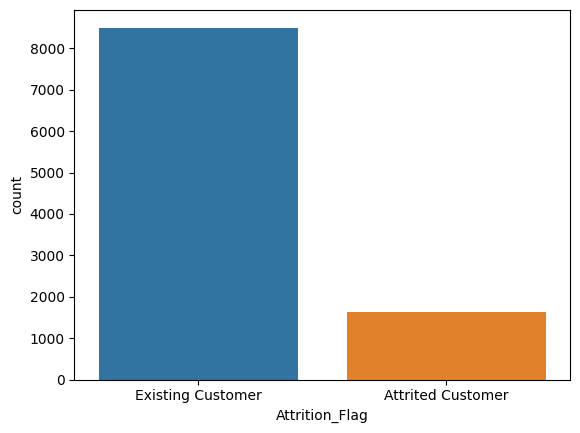

In [42]:
sns.countplot(df_clean, x='Attrition_Flag', hue='Attrition_Flag')

In [43]:
labelencoder = LabelEncoder()
df_clean['Attrition_Flag'] = labelencoder.fit_transform(df_clean['Attrition_Flag'])
df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [44]:
x = df_clean.iloc[:, 1:len(df_clean)]
y = df_clean.iloc[:,0]

In [45]:
y

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1
...,...
10122,1
10123,0
10124,0
10125,0


In [46]:
#sns.countplot(x, x='Attrition_Flag', hue="Attrition_flag")
df_clean.shape

(10127, 22)

In [47]:
base = df_clean

In [48]:
# to do fazer balanceamento

#importar  oversampling
#importar SMOTE



In [49]:
base.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [50]:
variaveis_preditoras2 = base.drop('Attrition_Flag', axis=1, inplace=False)


In [51]:
base.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [52]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [53]:
smote_balance = SMOTE()

variaveis_preditoras2_balanceada, y_balanceada = smote_balance.fit_resample(variaveis_preditoras2, y)


In [54]:
# escolhendo variaveis importantes para modelagem
test = SelectKBest(chi2, k=7)

In [55]:
fit = test.fit(variaveis_preditoras2_balanceada, y_balanceada)

In [56]:
fit.get_support(indices=True)

array([11, 12, 13, 15, 16, 19, 20])

In [57]:
features = fit.transform(x)

In [58]:
print(features)

[[1.26910e+04 7.77000e+02 1.19140e+04 ... 4.20000e+01 9.34480e-05
  9.99910e-01]
 [8.25600e+03 8.64000e+02 7.39200e+03 ... 3.30000e+01 5.68610e-05
  9.99940e-01]
 [3.41800e+03 0.00000e+00 3.41800e+03 ... 2.00000e+01 2.10810e-05
  9.99980e-01]
 ...
 [5.40900e+03 0.00000e+00 5.40900e+03 ... 6.00000e+01 9.97880e-01
  2.11827e-03]
 [5.28100e+03 0.00000e+00 5.28100e+03 ... 6.20000e+01 9.96710e-01
  3.29379e-03]
 [1.03880e+04 1.96100e+03 8.42700e+03 ... 6.10000e+01 9.96620e-01
  3.37654e-03]]


In [59]:
cols = fit.get_support(indices=True)
x_std = variaveis_preditoras2_balanceada.iloc[:, cols]

In [60]:
x_std

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,12691.000000,777,11914.000000,1144,42,0.000093,0.999910
1,8256.000000,864,7392.000000,1291,33,0.000057,0.999940
2,3418.000000,0,3418.000000,1887,20,0.000021,0.999980
3,3313.000000,2517,796.000000,1171,20,0.000134,0.999870
4,4716.000000,0,4716.000000,816,28,0.000022,0.999980
...,...,...,...,...,...,...,...
16995,12811.302997,1922,10888.772942,2093,51,0.996625,0.003376
16996,4475.372443,762,3713.343599,2577,41,0.995726,0.004276
16997,6148.996148,544,5604.612196,4100,64,0.981932,0.018068
16998,34516.000000,590,33925.700819,5352,63,0.997836,0.002163


In [61]:
std = StandardScaler().fit(x_std)

In [62]:
x = std.transform(x_std)

<Axes: >

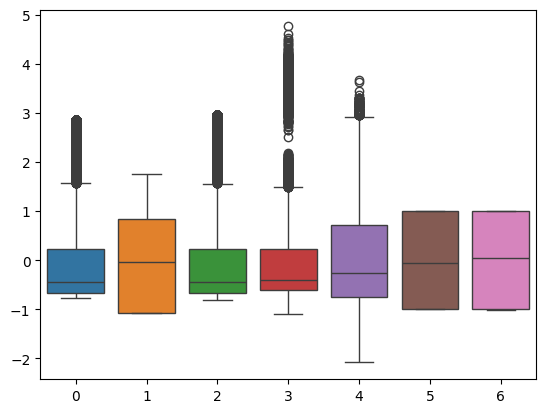

In [63]:
sns.boxplot(data=x)

In [64]:
x

array([[ 0.46316719, -0.19774511,  0.48194268, ..., -0.65663432,
        -1.00017124,  1.00017808],
       [-0.02168127, -0.09995238, -0.01193949, ..., -1.05761237,
        -1.0002448 ,  1.00023839],
       [-0.55058699, -1.07113543, -0.44597039, ..., -1.63680288,
        -1.00031673,  1.00031881],
       ...,
       [-0.25202571, -0.4596498 , -0.20715377, ...,  0.32353425,
         0.97383746, -0.97383736],
       [ 2.84914639, -0.4079433 ,  2.88600871, ...,  0.27898113,
         1.00581218, -1.00581468],
       [-0.76701417, -1.07113543, -0.66218856, ..., -0.65663432,
         1.00481665, -1.0048114 ]])

In [65]:
# seperar dados para o modelo
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y_balanceada, test_size=0.3)

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [67]:
erros = 100-(nb.score(xtrain, ytrain)*100)
print('erros: ', erros)

erros:  0.0


In [68]:
print('naive bayes score: ', nb.score(xtest, ytest)*100)

naive bayes score:  100.0
